In [4]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')


In [8]:
data_dir = Path('C:/users/user/Desktop/data/Oxford_Petdataset')

In [9]:
list_path = data_dir / 'annotations' / 'list.txt'
df = pd.read_csv(list_path, skiprows=6, delimiter=' ', header=None)
df.columns = ['file_name', 'id', 'species', 'breed']
df

,file_name,id,species,breed
0,Abyssinian_100,1,1,1
1,Abyssinian_101,1,1,1
2,Abyssinian_102,1,1,1
3,Abyssinian_103,1,1,1
4,Abyssinian_104,1,1,1
...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25
7345,yorkshire_terrier_97,37,2,25
7346,yorkshire_terrier_98,37,2,25
7347,yorkshire_terrier_99,37,2,25


In [10]:
print(df['species'].value_counts().sort_index())

1    2371
2    4978
Name: species, dtype: int64


<AxesSubplot:xlabel='species', ylabel='count'>

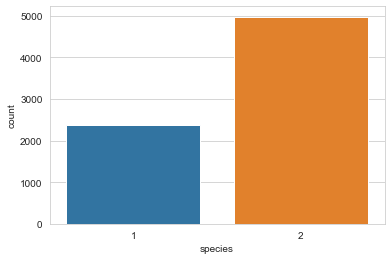

In [11]:
sns.countplot(data = df, x = 'species')

<AxesSubplot:xlabel='id', ylabel='count'>

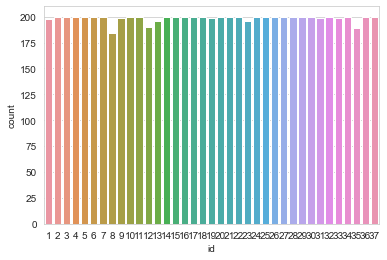

In [12]:
sns.countplot(data = df, x = 'id')

<AxesSubplot:xlabel='species', ylabel='count'>

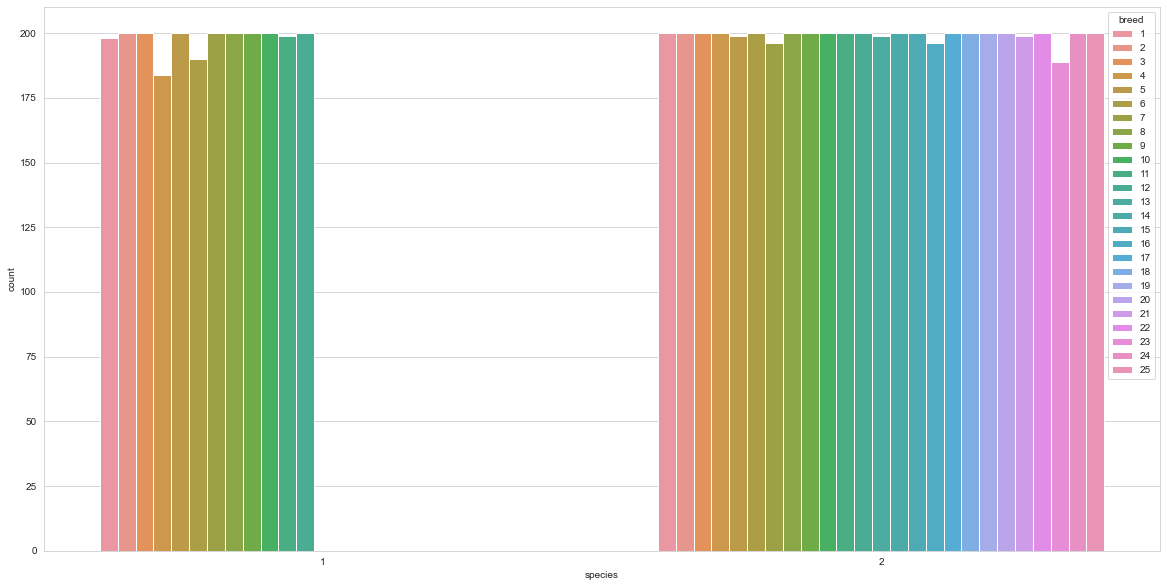

In [13]:
plt.figure(figsize=(20, 10))
sns.countplot(data = df, x = 'species', hue = 'breed')

In [14]:
image_dir = data_dir / 'images'
bbox_dir = data_dir / 'annotations' / 'xmls'
seg_dir = data_dir / 'annotations' / 'trimaps'

In [18]:
image_files = list(image_dir.glob('*.jpg'))
len(image_files)

7378

In [19]:
bbox_files = list(bbox_dir.glob('*.xml'))
len(bbox_files)

3686

In [20]:
seg_file = list(seg_dir.glob('*.png'))
len(seg_file)

14780

In [21]:
import cv2
# pip install opencv-python
import xml.etree.ElementTree as et
from matplotlib.patches import Rectangle

C:\users\user\Desktop\data\Oxford_Petdataset\images\Abyssinian_184.jpg
C:\users\user\Desktop\data\Oxford_Petdataset\annotations\xmls\Abyssinian_184.xml


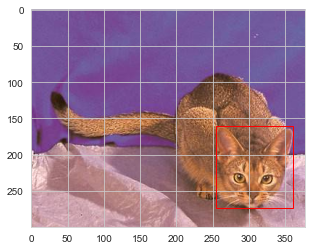

In [42]:
image_path = image_files[90]
bbox_path = bbox_dir / image_path.parts[-1].replace('jpg', 'xml')

image = cv2.imread(str(image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

tree = et.parse(bbox_path)

xmin = float(tree.find('./object/bndbox/xmin').text)
xmax = float(tree.find('./object/bndbox/xmax').text)
ymin = float(tree.find('./object/bndbox/ymin').text)
ymax = float(tree.find('./object/bndbox/ymax').text)

rect_x = xmin
rect_y = ymin
rect_w = xmax - xmin
rect_h = ymax - ymin

rect = Rectangle((rect_x, rect_y), rect_w, rect_h, fill=False, color='red')
plt.axes().add_patch(rect)
plt.imshow(image)

plt.show()

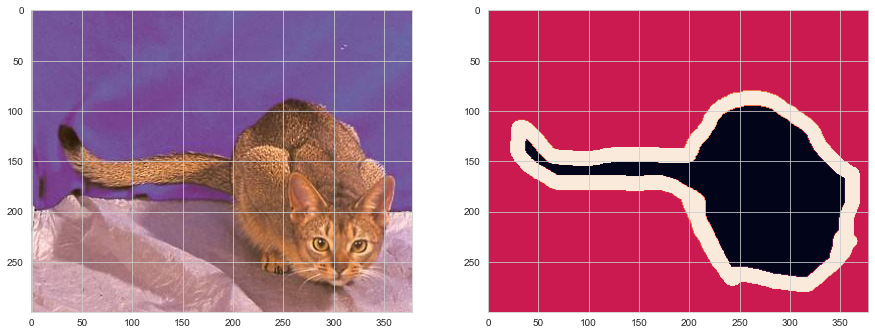

In [59]:
image_path = image_files[90]
seg_path = seg_dir / image_path.parts[-1].replace('jpg', 'png')

image = cv2.imread(str(image_path))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
seg_map = cv2.imread(str(seg_path), cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.subplot(1, 2, 2)
plt.imshow(seg_map)

plt.show()

# K fold

In [61]:
from sklearn.model_selection import KFold

In [62]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(kf.split(df), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   1    2    3 ... 7346 7347 7348] [   0    8   14 ... 7339 7341 7345] 1470
[   0    1    2 ... 7346 7347 7348] [  12   15   26 ... 7340 7342 7344] 1470
[   0    1    2 ... 7345 7346 7348] [   6    7   18 ... 7333 7343 7347] 1470
[   0    3    4 ... 7345 7347 7348] [   1    2   10 ... 7335 7336 7346] 1470
[   0    1    2 ... 7345 7346 7347] [   3    4    5 ... 7334 7338 7348] 1469


In [63]:
print(len(df[df['fold'] == 1]))
print(len(df[df['fold'] != 1]))

1470
5879


In [68]:
df

,file_name,id,species,breed,fold
0,Abyssinian_100,1,1,1,1
1,Abyssinian_101,1,1,1,4
2,Abyssinian_102,1,1,1,4
3,Abyssinian_103,1,1,1,5
4,Abyssinian_104,1,1,1,5
...,...,...,...,...,...
7344,yorkshire_terrier_96,37,2,25,2
7345,yorkshire_terrier_97,37,2,25,1
7346,yorkshire_terrier_98,37,2,25,4
7347,yorkshire_terrier_99,37,2,25,3


<AxesSubplot:xlabel='id', ylabel='count'>

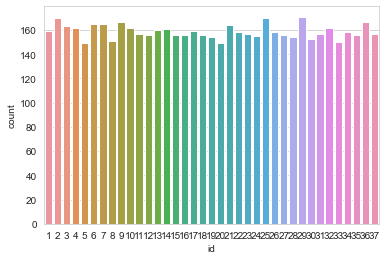

In [69]:
sns.countplot(data = df[df['fold'] != 5], x = 'id')

In [70]:
from sklearn.model_selection import StratifiedKFold

In [71]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

df['fold'] = -1
for idx, (t, v) in enumerate(skf.split(df, df['id']), 1):
    print(t, v, len(v))
    df.loc[v, 'fold'] = idx

[   0    1    3 ... 7346 7347 7348] [   2    7    8 ... 7326 7337 7345] 1470
[   1    2    3 ... 7346 7347 7348] [   0   12   13 ... 7323 7335 7339] 1470
[   0    2    3 ... 7345 7347 7348] [   1   14   19 ... 7341 7343 7346] 1470
[   0    1    2 ... 7346 7347 7348] [   3    4    5 ... 7334 7338 7342] 1470
[   0    1    2 ... 7343 7345 7346] [   9   21   23 ... 7344 7347 7348] 1469


<AxesSubplot:xlabel='id', ylabel='count'>

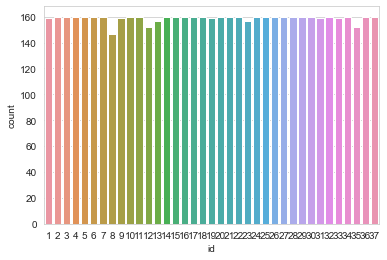

In [72]:
sns.countplot(data = df[df['fold'] != 5], x = 'id')

In [75]:
res_path = Path.cwd() / 'result'

if not res_path.exists():
    res_path.mkdir()

In [76]:
df.to_csv('result/kfolds.csv', index=False)